# COGS 108 - TEAM 44: FINAL PROJECT

# Overview
Today we live in a society where businesses' success, especially franchises, are greatly impacted by the number of stores they own. Of course, when we look into Starbucks, we can tell that their goal is to open as many stores as they can. However, opening too many stores that bring little profit can cause businesses downfall. For Starbucks, too, to thrive, their choice of location must be taken in great consideration. Moreover, it makes sense that businesses would want to open their stores where their customers are. Looking to improve Starbucks franchise's growth and expansion of their units, we used Starbucks dataset and Census API to try to establish a profile of Starbucks customer base and predict the most promising locations (that not yet had a Starbucks) to open a new store. With our data analysis, we can hopefully give further insight to the Starbucks chain to help them to expand their business.

# Group Member IDs and Names 

U08273331 Baichuan Tang

A14394510 Catherine Wang

A14881312 Jian Fan

A12426296 Kim Pham

A15212562 Ryan Eveloff

# Research Question

Our project sets out to predict *the best location(s) to open the next Starbucks*.
And to answer that question, we will be looking at Starbucks store data and how that maps to Census demographics to develop a "profile" (list of criteria) of a city where Starbucks is likely to expand its business. Using this "profile", we will produce a list of potential cities meeting those criteria.


# Background and Prior Work

Before diving into the real nitty-gritty code work, we did some research to best assist us. First, to stress the importance of our project, we looked at how Starbucks has been employing technology to its favor: in a recent <a href="https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/">collaboration</a> with Microsoft, they use machine learning to gather customer preferences, connecting coffeemakers in stores to the internet to blockchain services for tracing coffee. They are talking about the increased hiring of software engineers at companies outside the industry that are embracing high tech solutions. This is important for our project because we are using data science to figure out how the relationships and concepts we learn from our data can help a company and franchise like Starbucks. If we are able to find factors that affect and optimize a certain location for Starbucks to open, it can be really useful for companies that can benefit from data scientists and software engineers.
Fortunately a <a href="https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf">study</a> by Chungyu Institute of Technology provides us some pointers. It suggested that "Starbucks Coffee should also pay more attention to male, young customers who are under 35 years old, and consumers who have a high school diploma or equivalent and associate
degree for increasing market share." Therefore we will be analyzing factors such as gender, age, and education level to see if there's a correlation (if any) between certain demographics, the locations established by Starbucks, and its success in those locations.

Additionally, we found a similar <a href="https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA">project</a> in R done by Jordan Bean. He is someone that is naturally curious about how Starbucks think about location selection, and how their store locations can reveal their customer base and how they view locations as more attractive than others. His project is similar to our project in many ways because we also want to look into the locations of Starbucks. However, we want to focus on generating an idea of where Starbucks locations can be and are most successful, not necessarily what Starbucks themselves plan when choosing a location to open their stores. Jordan Bean usefully uses zip codes to differentiate locations of Starbucks just like us too. 

References (include links):

- 1) Starbucks' collaboration with Microsoft: 
https://www.geekwire.com/2019/microsoft-teams-starbucks-predictive-drive-thru-ordering-bean-cup-blockchain/
- 2) Jordan Bean's article: 
https://towardsdatascience.com/analyzing-and-predicting-starbucks-location-strategy-3c5026d31c21?fbclid=IwAR2F6BPuAQfFJU9OXS5WQaSlv2zuB6wPl89WXqU5ORcaPfq-2rtMH-2zOfA
- 3) Study: 
https://pdfs.semanticscholar.org/00b4/46b1a605c29326690d8c038c30030b7342cd.pdf

# Hypothesis


Our project primarily focuses on determining the relationship between Starbucks locations and associated demographic factors such as gender, age, income, and education level. We predict that there will be a positive correlation between the factors stated above and the existing Starbucks locations.

# Dataset(s)

## a) Starbucks store data
- Dataset Name: storedata.csv
- Link to the dataset: https://www.kaggle.com/starbucks/store-locations
- Number of observations: 25600

*We used a Starbucks locations worldwide dataset that has a record for every Starbucks or subsidiary store location currently in operation as of February 2017. Scraped from the Starbucks store locator webpage by Github user chrismeller, this dataset contains columns from store number to location based columns such as address, postal code, longitude, and latitude.*

## b) Census data
- Dataset Name: Census API
- Link to the dataset: https://api.census.gov/data/2016/acs/acs5/variables.html
- Number of observations: 33120

*We used a census API key to access the information about population in each state and later put it in a comprehensive table. The dataset we used from the United States Census Bureau was _Detailed Table_ of the American Community Survey 5-Year Data (2013-2017). It contains detailed social, economic, housing, and demographic information. The data are presented as population counts. We narrow down this table to contain the information that we need for our analysis, which includes gender count for age ranges 15-17, 18-19, 20, 21, 22-24, 25-29, 30-34, 35-39, median age, median household income, count of male/female workers, total population, median rent, median home value, and count of people with high school diploma, Bachelor's Degree, and Master's Degree. More information can be found <a href=https://api.census.gov/data/2016/acs/acs5/variables.html>here</a>*


*We plan on combining these datasets to visualize a Starbucks profile, by looking at the census information of areas that have Starbucks stores. We can then visualize information such as gender in each age range of all Starbucks customers, Starbucks customer education level, and what the bigger picture of the datasets can reveal for us—how the Starbucks profile differ from the rest of the population.*

# Setup

For Analysis and Results, we must install geopandas, lippysal, mapclassify, and dill. The following code box is commented out because we only needed to install them once.

In [1]:
#!pip install geopandas
#!pip install libpysal
#!pip install mapclassify
#!pip install dill
#!pip install descartes
#!pip install census
#!pip install us
#!pip install censusdata

In [2]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from census import Census
from us import states
import censusdata
from scipy import stats 

# Erase warnings
import warnings
warnings.filterwarnings("ignore")

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

#For geo infomation processing
import geopandas as gpd
import libpysal
import mapclassify
from shapely.geometry import Point
import patsy
import statsmodels.api as sm

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning
Data files:
    - Starbucks store_data.csv
    - Census 

## a) Starbucks: Load Data
Import data into a DataFrame structure called `df_starbucks`

In [3]:
df_starbucks=pd.read_csv('store_data.csv')
df_starbucks

,Brand,Store Number,Store Name,Ownership Type,...,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,...,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,...,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
...,...,...,...,...,...,...,...,...,...
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,...,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,...,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
25599,Starbucks,47609-253286,Mall of Africa,Licensed,...,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


We want to create a map to visualize, therefore we need a Longitude and Latitude component to create a geometry column that has points of Longitude and Latitude for every existing Starbucks.

In [4]:
geometry=pd.Series()
for i in df_starbucks.index:
    geometry.loc[i]=Point((df_starbucks.loc[i,'Longitude'],\
                           df_starbucks.loc[i,'Latitude']))
df_starbucks['geometry']=geometry
df_starbucks

,Brand,Store Number,Store Name,Ownership Type,...,Timezone,Longitude,Latitude,geometry
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,...,GMT+1:00 Europe/Andorra,1.53,42.51,POINT (1.53 42.51)
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,...,GMT+04:00 Asia/Dubai,55.47,25.42,POINT (55.47 25.42)
2,Starbucks,47089-256771,Dana Mall,Licensed,...,GMT+04:00 Asia/Dubai,55.47,25.39,POINT (55.47 25.39)
...,...,...,...,...,...,...,...,...,...
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,...,GMT+000000 Africa/Johannesburg,28.04,-26.15,POINT (28.04 -26.15)
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,...,GMT+000000 Africa/Johannesburg,28.28,-25.79,POINT (28.28 -25.79)
25599,Starbucks,47609-253286,Mall of Africa,Licensed,...,GMT+000000 Africa/Johannesburg,28.11,-26.02,POINT (28.11 -26.02)


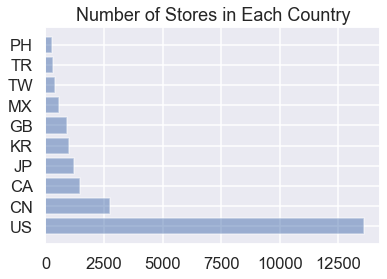

In [5]:
#get count of starbucks in each country
top10country=df_starbucks.groupby('Country').apply(lambda x:len(x)).\
sort_values(ascending=False)[:10]
#draw horizontal bar chart
y_pos = np.arange(len(top10country))
plt.barh(y_pos, top10country.values, align='center', alpha=0.5)
plt.yticks(y_pos, top10country.index)
#plt.xlabel('Usage')
plt.title('Number of Stores in Each Country')

plt.show()

Seeing that there are exceptionally huge amount of Starbucks in the US, we will focus our analysis on to just those Starbucks. Store data in `df_starbucks_US`

In [6]:
df_starbucks_US = df_starbucks[df_starbucks['Country']=='US']
print("There are %s Starbucks in the US"%len(df_starbucks_US))
df_starbucks_US

There are 13608 Starbucks in the US


,Brand,Store Number,Store Name,Ownership Type,...,Timezone,Longitude,Latitude,geometry
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,...,GMT-09:00 America/Anchorage,-149.78,61.21,POINT (-149.78 61.21)
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,...,GMT-09:00 America/Anchorage,-149.84,61.14,POINT (-149.84 61.14)
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,...,GMT-09:00 America/Anchorage,-149.85,61.11,POINT (-149.85 61.11)
...,...,...,...,...,...,...,...,...,...
25569,Starbucks,22425-219024,Laramie - Grand & 30th,Company Owned,...,GMT-07:00 America/Denver,-105.56,41.31,POINT (-105.56 41.31)
25570,Starbucks,10849-103163,I-80 & Dewar Dr-Rock Springs,Company Owned,...,GMT-07:00 America/Denver,-109.25,41.58,POINT (-109.25 41.58)
25571,Starbucks,10769-102454,Coffeen & Brundage Lane-Sheridan,Company Owned,...,GMT-07:00 America/Denver,-106.94,44.77,POINT (-106.94 44.77)


Narrow down even more to have the table only contain information we need. In other words, drop columns "Brand" (obviously they're all Starbucks), "Store Number", "Ownership Type", "Country", "Phone Number", and "Timezone".

In [7]:
df_starbucks_US = df_starbucks_US.drop(columns=['Brand','Store Number',\
                                                'Ownership Type','Country',\
                                                'Phone Number','Timezone',\
                                                'Longitude','Latitude'])
#reseting index to start from 0
df_starbucks_US.reset_index(drop=True,inplace=True)
#Rename some columns to have simpler name
df_starbucks_US=df_starbucks_US.rename({'State/Province':'State',\
                                        'Postcode':'zip'}, axis='columns')
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,995042300,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,995073444,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,995153596,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,829015751,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,828016213,POINT (-106.94 44.77)


## b) Starbucks: Find Missing Data
Drop rows with missing data. We will try to minimize the number of rows dropped to maximize our prediction accuracy. Therefore we will only drop rows with missing data in the following columns "Store Number", "Ownership Type", "City", "State", and "Zip" because they are of importance to our analysis.

In [8]:
df_starbucks_US = df_starbucks_US.dropna(subset=['City','State','zip'])
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,995042300,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,995073444,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,995153596,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,829015751,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,828016213,POINT (-106.94 44.77)


## c) Starbucks: Standardize Zip Codes
We can see that some zipcodes have 9 digits, some have 5, some have less than 4. We will standardize them to have 5 digits.

In [9]:
def standardize_zip (zip):
    if len(zip) < 5:
        #prepend 0's to shorter zipcodes
        newzip = zip.zfill(5)
    else:
        newzip = str(zip)
        #cut longer zipcodes to 5-digits
        newzip = zip[:5]
    return newzip        

In [10]:
# Test function:
print('INPUT', '\t\t-\t', 'OUTPUT')
for inp in ['828016213', '92843', '06608', '066081234', '501','1035']:
    print('{:10s} \t-\t {:10s}'.format(inp, standardize_zip(inp)))

INPUT 		-	 OUTPUT
828016213  	-	 82801     
92843      	-	 92843     
06608      	-	 06608     
066081234  	-	 06608     
501        	-	 00501     
1035       	-	 01035     


In [11]:
df_starbucks_US['zip'] = df_starbucks_US['zip'].apply(standardize_zip)
df_starbucks_US

,Store Name,Street Address,City,State,zip,geometry
0,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,Anchorage,AK,99504,POINT (-149.78 61.21)
1,Safeway-Anchorage #2628,1725 Abbott Rd,Anchorage,AK,99507,POINT (-149.84 61.14)
2,Safeway - Anchorage #1813,1501 Huffman Rd,Anchorage,AK,99515,POINT (-149.85 61.11)
...,...,...,...,...,...,...
13605,Laramie - Grand & 30th,3021 Grand Ave,Laramie,WY,82070,POINT (-105.56 41.31)
13606,I-80 & Dewar Dr-Rock Springs,118 Westland Way,Rock Springs,WY,82901,POINT (-109.25 41.58)
13607,Coffeen & Brundage Lane-Sheridan,2208 Coffeen Ave,Sheridian,WY,82801,POINT (-106.94 44.77)


## d) Census: Import and Putting Data Into Comprehensive Table

In [12]:
# Obtain a census API key to access the information about population 
#in each state
c = Census("d05cc8c102603c7b50d7705c8f45251177e6346b")

In [13]:
# Creating a dict that matches ids to real values. More information can 
#be found here: https://api.census.gov/data/2016/acs/acs1/variables.html
info_dict = dict(male_15_17 = 'B01001_006E',
male_18_19 = 'B01001_007E',
male_20 = 'B01001_008E',
male_21 = 'B01001_009E',
male_22_24 = 'B01001_010E',
male_25_29 = 'B01001_011E',
male_30_34 = 'B01001_012E',
male_35_39 = 'B01001_013E',
male_40_44 = 'B01001_014E',
male_45_49 = 'B01001_015E',
male_50_54 = 'B01001_016E',
male_55_59 = 'B01001_017E',
male_60_61 = 'B01001_018E',
male_62_64 = 'B01001_019E',
male_65_66 = 'B01001_020E',
male_67_69 = 'B01001_021E',
male_70_74 = 'B01001_022E',
male_75_79 = 'B01001_023E',
male_80_84 = 'B01001_024E',
male_85_plus = 'B01001_025E',
female_15_17 = 'B01001_030E',
female_18_19 = 'B01001_031E',
female_20 = 'B01001_032E',
female_21 = 'B01001_033E',
female_22_24 = 'B01001_034E',
female_25_29 = 'B01001_035E',
female_30_34 = 'B01001_036E',
female_35_39 = 'B01001_037E',
female_40_44 = 'B01001_038E',
female_45_49 = 'B01001_039E',
female_50_54 = 'B01001_040E',
female_55_59 = 'B01001_041E',
female_60_61 = 'B01001_042E',
female_62_64 = 'B01001_043E',
female_65_66 = 'B01001_044E',
female_67_69 = 'B01001_045E',
female_70_74 = 'B01001_046E',
female_75_79 = 'B01001_047E',
female_80_84 = 'B01001_048E',
female_85_plus = 'B01001_049E',
median_age = 'B01002_001E', 
median_hh_income = 'B19013_001E',
male_workers = 'B23022_003E',
female_workers = 'B23022_027E',
total_population = 'B01001_001E', 
median_rent = 'B25031_001E',
median_home_value = 'B25077_001E',
high_school_diploma = 'B15003_017E',
bachelors_degree = 'B15003_022E',
masters_degree = 'B15003_023E')
print("There are totally %s raw features selected"%len(info_dict))

There are totally 50 raw features selected


Put data into a DataFrame structure called `df_census`

In [14]:
df_census=pd.DataFrame(c.acs5.zipcode(list(info_dict.values()), \
                                      Census.ALL))
#because the dataframe's columns' order was not by what we provide
#('info_dict.values()'), but the order of alphabet so we need to re-order 
#it first
cols=list(info_dict.values())
cols.append('zip code tabulation area')
df_census =df_census[cols]
df_census

,B01001_006E,B01001_007E,B01001_008E,B01001_009E,...,B15003_017E,B15003_022E,B15003_023E,zip code tabulation area
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


Replace census data variables with the dictionary of more meaningful titles we created above

In [15]:
dic=dict(info_dict)
#reverse dict
dic={v:k for k,v in dic.items()}
df_census.rename(dic,axis='columns',inplace=True)
df_census.rename(columns={'zip code tabulation area':'zip'}, inplace=True)
df_census

,male_15_17,male_18_19,male_20,male_21,...,high_school_diploma,bachelors_degree,masters_degree,zip
0,0.0,0.0,0.0,0.0,...,24.0,35.0,18.0,84306
1,10.0,5.0,0.0,3.0,...,50.0,71.0,58.0,84775
2,0.0,0.0,0.0,0.0,...,83.0,22.0,22.0,84762
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


In [16]:
#clean null values
df_census = df_census.dropna()
#drop negative values because our table contains only people count and age 
#therefore negative values indicate invalid input 
df_census['total_population']=df_census['total_population'].apply(float)
df_census=df_census[(df_census.loc[:,'male_15_17':'masters_degree'] >= 0).\
                    all(1)]
df_census

,male_15_17,male_18_19,male_20,male_21,...,high_school_diploma,bachelors_degree,masters_degree,zip
5,217.0,67.0,18.0,59.0,...,433.0,396.0,236.0,84511
6,43.0,8.0,0.0,0.0,...,306.0,94.0,17.0,84513
9,178.0,31.0,28.0,82.0,...,1646.0,1177.0,498.0,84532
...,...,...,...,...,...,...,...,...,...
33117,33.0,42.0,9.0,13.0,...,613.0,388.0,302.0,14840
33118,360.0,162.0,117.0,68.0,...,2839.0,950.0,822.0,14843
33119,51.0,23.0,11.0,6.0,...,428.0,254.0,163.0,14847


# DATA VISUALIZATION

## a) Visualizing Starbucks "Profile" 

DataFrame `df_profile` contains Census information of areas that have Starbucks

In [17]:
df_profile = pd.merge(df_starbucks_US['zip'], df_census, how='left', \
                      on='zip')
df_profile

,zip,male_15_17,male_18_19,male_20,...,median_home_value,high_school_diploma,bachelors_degree,masters_degree
0,99504,1068.0,551.0,595.0,...,256400.0,5745.0,5119.0,2131.0
1,99507,630.0,432.0,134.0,...,292400.0,4383.0,5900.0,2237.0
2,99515,591.0,293.0,130.0,...,315600.0,3263.0,3265.0,1235.0
...,...,...,...,...,...,...,...,...,...
13604,82070,216.0,644.0,404.0,...,222600.0,1675.0,3151.0,1633.0
13605,82901,637.0,475.0,138.0,...,201000.0,5071.0,2788.0,940.0
13606,82801,544.0,345.0,245.0,...,233000.0,3427.0,3229.0,1665.0


Visualizing the gender in each age range of all Starbucks customers

In [18]:
#Clumping age columns together so that age range is 5 years each
df_gender_age= pd.DataFrame(columns=['male_15_19','male_20_24','male_25_29',\
                                     'male_30_34','male_35_39','male_40_44',\
                                     'male_45_49','male_50_54','male_55_59',\
                                     'male_60_64','male_65_69','male_70_74',\
                                     'male_75_79','male_80_84','male_85_plus',
                                     'female_15_19','female_20_24',
                                     'female_25_29','female_30_34',
                                     'female_35_39','female_40_44',
                                     'female_45_49', 'female_50_54',
                                     'female_55_59','female_60_64',
                                     'female_65_69','female_70_74',
                                     'female_75_79','female_80_84',
                                     'female_85_plus'])
df_gender_age['male_15_19'] = df_profile['male_15_17'] + df_profile['male_18_19']
df_gender_age['male_20_24'] = df_profile['male_20'] + df_profile['male_21'] +\
df_profile['male_22_24'] 
df_gender_age.loc[:,'male_25_29':'male_55_59'] = df_profile.loc\
[:,'male_25_29':'male_55_59']
df_gender_age['male_60_64'] = df_profile['male_60_61'] + df_profile['male_62_64']
df_gender_age['male_65_69'] = df_profile['male_65_66'] + df_profile['male_67_69'] 
df_gender_age.loc[:,'male_70_74':'male_85_plus'] = df_profile.loc\
[:,'male_70_74':'male_85_plus']

df_gender_age['female_15_19'] = df_profile['female_15_17'] + df_profile['female_18_19']
df_gender_age['female_20_24'] = df_profile['female_20'] + df_profile['female_21'] \
+ df_profile['female_22_24'] 
df_gender_age.loc[:,'female_25_29':'female_55_59'] = df_profile.loc\
[:,'female_25_29':'female_55_59']
df_gender_age['female_60_64'] = df_profile['female_60_61'] \
+ df_profile['female_62_64']
df_gender_age['female_65_69'] = df_profile['female_65_66'] \
+ df_profile['female_67_69'] 
df_gender_age.loc[:,'female_70_74':'female_85_plus'] = df_profile.loc\
[:,'female_70_74':'female_85_plus']

In [19]:
df_gender_age

,male_15_19,male_20_24,male_25_29,male_30_34,...,female_70_74,female_75_79,female_80_84,female_85_plus
0,1619.0,2534.0,2226.0,1531.0,...,568.0,292.0,288.0,218.0
1,1062.0,1422.0,2023.0,1550.0,...,500.0,272.0,162.0,256.0
2,884.0,710.0,1011.0,1037.0,...,393.0,257.0,275.0,238.0
...,...,...,...,...,...,...,...,...,...
13604,860.0,2093.0,1002.0,907.0,...,333.0,163.0,178.0,164.0
13605,1112.0,1075.0,1275.0,1262.0,...,244.0,230.0,230.0,106.0
13606,889.0,736.0,720.0,770.0,...,669.0,314.0,344.0,433.0


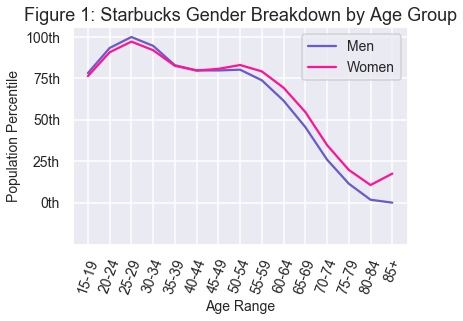

In [20]:
# Concatenate age ranges for each gender
s_male = df_gender_age.loc[:, 'male_15_19':'male_85_plus'].sum()
s_female = df_gender_age.loc[:, 'female_15_19':'female_85_plus'].sum()

# Clean up indices
headers = [s.replace('male_','').replace('_','-') for s in s_male.index]
headers[-1] = '85+'
s_male.index, s_female.index = headers, headers

# Combine the two genders into one series
s_both = pd.concat([s_male, s_female], axis=1)
s_both.columns = ['male','female']

# Make the yticks for the plot
max_tick = np.max(s_male.values) if np.max(s_male.values) > np.max\
(s_female.values) else np.max(s_female.values)
min_tick = np.min(s_male.values) if np.min(s_male.values) < np.min\
(s_female.values) else np.min(s_female.values)
diff_tick = max_tick - min_tick
plot_ticks = [min_tick,min_tick + (diff_tick*.25),min_tick + \
              (diff_tick*.5),min_tick + (diff_tick*.75),max_tick]
plot_labels = ['0th','25th','50th','75th','100th']

# Make the xticks for the plot
N = len(s_both.index)
ind = np.arange(N)
width = 0.35

# Plot the lines
male_fig = plt.plot(ind, s_both['male'], width, label='Men',\
                    color='slateblue')
female_fig = plt.plot(ind, s_both['female'], width, label='Women',\
                      color='deeppink')

# Make it look pretty
plt.ylabel('Population Percentile',fontsize=14)
plt.xlabel('Age Range',fontsize=14)
plt.title('Figure 1: Starbucks Gender Breakdown by Age Group')
plt.ticklabel_format(style='plain')
plt.xticks(ind, s_both.index, rotation=70,fontsize=14)
plt.yticks(plot_ticks,labels=plot_labels,fontsize=14)
plt.legend((male_fig[0], female_fig[0]), s_both.columns, \
           handles=[male_fig[0],female_fig[0]],loc='upper right',\
           fontsize=14)

plt.show()

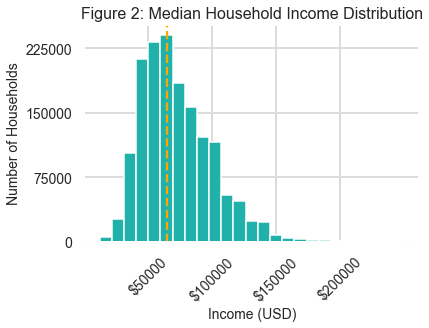

Most Frequent Income is ~$59917/year
(Marked by dashed line)


In [21]:
# Plot histogram
xt = [0,50000,100000,150000,200000]

plt.title('Normalized Median Household Income')

# Beta-fit for line of best fit
x_min, x_max = min(xt), max(xt)  
lnspc = np.linspace(x_min, x_max, len(df_profile['median_hh_income']))
ab,bb,cb,db = stats.beta.fit(df_profile['median_hh_income'])  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  

# axes
y_headers = [0,75000,150000,225000]
plt.axes(facecolor='white',yticklabels=y_headers)
plt.grid(color='gainsboro', linestyle='-', linewidth=2)

# x-ticks
plt.xticks(xt,labels=['$' + str(i) for i in xt],rotation=45,fontsize=14)
plt.xlabel('Income (USD)',fontsize=14)
# y-ticks
plt.ylabel('Number of Households',fontsize=14)
plt.yticks(fontsize=14)

# figure
plt.title('Figure 2: Median Household Income Distribution',fontsize=16)
y, x, _ = plt.hist(df_profile['median_hh_income'],bins=25,normed=True,\
                   color='lightseagreen')
plt.plot(lnspc, pdf_beta, label="Beta",color='red')

# peak
y = y.tolist()
xpos = y.index(max(y))
plt.axvline(x=(x[xpos]+5000),color='orange',ls='dashed')


plt.show()
print("Most Frequent Income is ~$%.0f/year\n(Marked by dashed line)" %x[xpos])

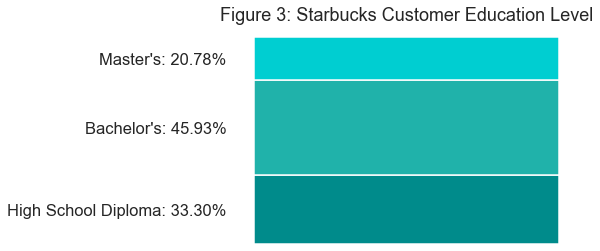

In [22]:
# Concatenate across zips
s_hs = pd.Series([df_profile['high_school_diploma'].sum()])
s_bs = pd.Series([df_profile['bachelors_degree'].sum()])
s_ms = pd.Series([df_profile['masters_degree'].sum()])
s_total = s_hs + s_bs + s_ms

# Clean up indices
hs_trunc = np.around(s_hs.values[0]/s_total*100,3)
bs_trunc = np.around(s_bs.values[0]/s_total*100,3)
ms_trunc = np.around(s_ms.values[0]/s_total*100,3)
headers = ["High School Diploma: %.2f%%" %hs_trunc,"Bachelor's: %.2f%%" \
           %bs_trunc,"Master's: %.2f%%" %ms_trunc]

# Hide ticks to make it more of an image, make it pretty
plt.yticks([s_hs.values[0]*.5,s_hs[0]+s_bs[0]*.5,s_hs[0]+s_bs[0]+s_ms[0]*.5],\
           labels=headers)
plt.bar([0],s_hs,color='darkcyan')
plt.bar([0],s_bs,color='lightseagreen',bottom=s_hs)
plt.bar([0],s_ms,color='darkturquoise',bottom=s_bs+s_hs)
plt.title('Figure 3: Starbucks Customer Education Level')
plt.box(False)
plt.xticks([])
plt.show()

These visualizations give insight to Starbucks customer profile: (slightly) more male customers within 25-29 age range, under 100000 household income, and with a Bachelor's degree

## b) How Starbucks Profile Differ From The Rest of Population

Dataframe `df_final` contains census data  + additional columns "starbucks_count" and "has starbucks" 

In [23]:
#get number of starbucks in each zipcode
num_starbucks_in_zipcode = df_starbucks_US.pivot_table(index=['zip'], \
                                                       aggfunc = 'size')
num_starbucks_in_zipcode = pd.DataFrame({'zip':num_starbucks_in_zipcode.index,\
                                         'starbucks_count':num_starbucks_in_zipcode.values})
#merge to get df_final
df_final = df_census.merge(num_starbucks_in_zipcode, how='left', on='zip')
df_final = df_final.fillna(0)
df_final['has_starbucks'] = np.where(df_final['starbucks_count'] > 0, 1, 0)
df_final

,male_15_17,male_18_19,male_20,male_21,...,masters_degree,zip,starbucks_count,has_starbucks
0,217.0,67.0,18.0,59.0,...,236.0,84511,0.0,0
1,43.0,8.0,0.0,0.0,...,17.0,84513,0.0,0
2,178.0,31.0,28.0,82.0,...,498.0,84532,1.0,1
...,...,...,...,...,...,...,...,...,...
26693,33.0,42.0,9.0,13.0,...,302.0,14840,0.0,0
26694,360.0,162.0,117.0,68.0,...,822.0,14843,0.0,0
26695,51.0,23.0,11.0,6.0,...,163.0,14847,0.0,0


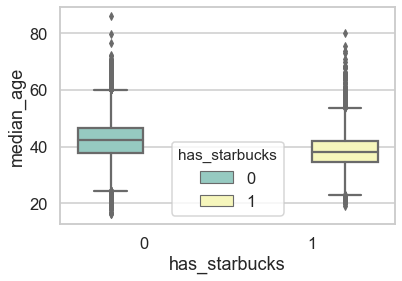

In [24]:
sns.set_style('whitegrid')
ax=sns.boxplot(x='has_starbucks',y='median_age',hue='has_starbucks',\
               data=df_final,palette='Set3')

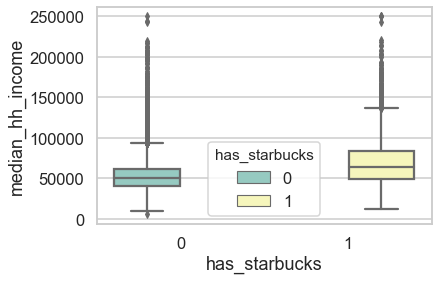

In [25]:
ax=sns.boxplot(x='has_starbucks',y='median_hh_income',hue='has_starbucks',\
               data=df_final,palette='Set3')

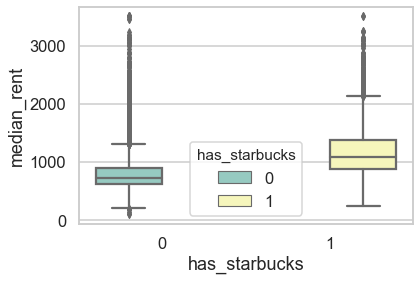

In [26]:
ax=sns.boxplot(x='has_starbucks',y='median_rent',hue='has_starbucks',\
               data=df_final,palette='Set3')

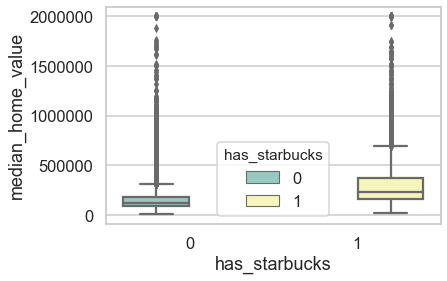

In [27]:
ax=sns.boxplot(x='has_starbucks',y='median_home_value',hue='has_starbucks',\
               data=df_final,palette='Set3')

These boxplots compare the median values between the population with Starbucks and the population without Starbucks. We can see that the population with Starbucks tend to have lower median age, higher median household income, higher median rent, and higher median home value.  

# GEOSPATIAL ANALYSIS

## a) Does Population Affect Number of Starbucks?

In [28]:
popu_dic={'B01001_001E':'total_population'}
df_population=pd.DataFrame(c.acs5.state(list(popu_dic.keys()), Census.ALL))
for i in df_population.index:
    df_population.loc[i,'State']=states.lookup(df_population['state'][i]).abbr
df_population.rename(popu_dic,axis='columns',inplace=True)
df_population['total_population']=df_population['total_population'].apply(float)/10000
df_population

,total_population,state,State
0,346.90,72,PR
1,485.08,01,AL
2,73.86,02,AK
...,...,...,...
49,717.00,53,WA
50,58.32,56,WY
51,576.32,55,WI


In [29]:
geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
df_population=df_population.merge(geo_table,left_on='State',right_on='STATE_ABBR')
df_population

,total_population,state,State,AREA,...,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,485.08,01,AL,12.90,...,01,E S Cen,AL,POLYGON ((-85.07013702392578 31.98054504394531...
1,680.99,04,AZ,28.86,...,04,Mtn,AZ,POLYGON ((-114.5198440551758 33.02766799926758...
2,297.79,05,AR,13.52,...,05,W S Cen,AR,"POLYGON ((-94.46147918701172 34.1966552734375,..."
...,...,...,...,...,...,...,...,...,...
45,717.00,53,WA,20.75,...,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...
46,58.32,56,WY,27.97,...,56,Mtn,WY,"POLYGON ((-104.053108215332 41.69824600219727,..."
47,576.32,55,WI,16.48,...,55,E N Cen,WI,(POLYGON ((-87.74845123291016 44.9616279602050...


In [30]:
#since there are so few people in Hawaii and Alaska, and we have very little infomation about these two places, we will 
#be focusing only on the 48 main states.
df_starbucks_US = df_starbucks_US[(df_starbucks_US['State']  !='AK') & \
                                  (df_starbucks_US['State']  !='HI')]

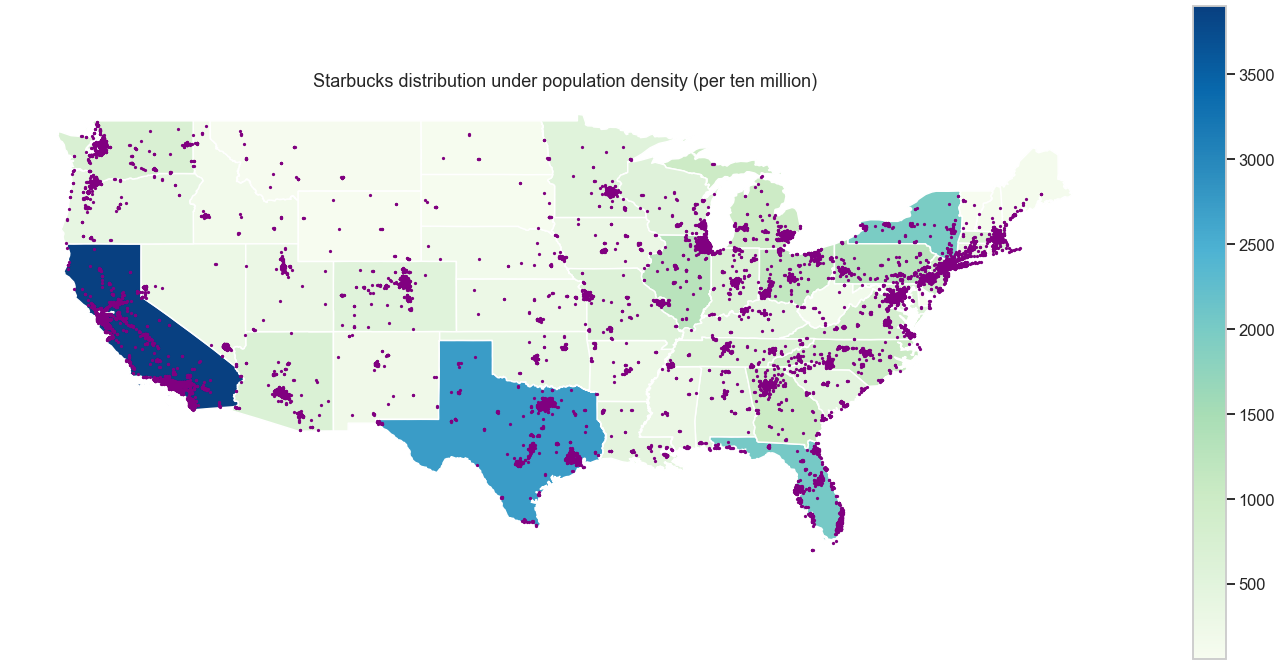

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (25,12))
df_population=gpd.GeoDataFrame(df_population)
df_starbucks_US=gpd.GeoDataFrame(df_starbucks_US)
base=df_population.plot(ax=ax,column='total_population',cmap='GnBu', \
                        legend=True)
df_starbucks_US.plot(ax=base,marker='o',color='purple',markersize=3)
plt.axis('off')
plt.title("Starbucks distribution under population density (per ten million)")
plt.show()
# scale: ten million

In [32]:
x=pd.DataFrame(df_starbucks_US['State'].value_counts())
x.columns=['starbucks_count']
x['STATE_ABBR']=x.index
x= x.reset_index(drop=True)
x

,starbucks_count,STATE_ABBR
0,2821,CA
1,1042,TX
2,757,WA
...,...,...
46,23,WY
47,13,ND
48,8,VT


In [33]:
#combine the table with df_population to get the number of starbucks in a state
df_population=pd.merge(df_population,x,on=['STATE_ABBR'])
df_population['population_density']=df_population['total_population']/df_population['AREA']
df_population

,total_population,state,State,AREA,...,STATE_ABBR,geometry,starbucks_count,population_density
0,485.08,01,AL,12.90,...,AL,POLYGON ((-85.07013702392578 31.98054504394531...,85,37.61
1,680.99,04,AZ,28.86,...,AZ,POLYGON ((-114.5198440551758 33.02766799926758...,488,23.60
2,297.79,05,AR,13.52,...,AR,"POLYGON ((-94.46147918701172 34.1966552734375,...",55,22.03
...,...,...,...,...,...,...,...,...,...
45,717.00,53,WA,20.75,...,WA,(POLYGON ((-122.400749206543 48.22539520263672...,757,34.55
46,58.32,56,WY,27.97,...,WY,"POLYGON ((-104.053108215332 41.69824600219727,...",23,2.09
47,576.32,55,WI,16.48,...,WI,(POLYGON ((-87.74845123291016 44.9616279602050...,145,34.98


In [34]:
outcome_1, predictors_1=patsy.dmatrices('starbucks_count~population_density',\
                                        df_population)
print(sm.OLS(outcome_1, predictors_1).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        starbucks_count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3724
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.545
Time:                        22:39:41   Log-Likelihood:                -359.42
No. Observations:                  48   AIC:                             722.8
Df Residuals:                      46   BIC:                             726.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            248.3082     80

In [35]:
outcome_2, predictors_2=patsy.dmatrices('starbucks_count~total_population',\
                                        df_population)
print(sm.OLS(outcome_2, predictors_2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        starbucks_count   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     206.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.30e-18
Time:                        22:39:41   Log-Likelihood:                -318.77
No. Observations:                  48   AIC:                             641.5
Df Residuals:                      46   BIC:                             645.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -82.6800     37.138  

According to p value, which is high, population density does not significantly predict number of starbucks, but total population can (not advisable to some extent)

## b) Does Our Profile Affect The Starbucks Count?

In [36]:
outcome_3, predictors_3=patsy.dmatrices('starbucks_count~male_25_29 \
+ median_hh_income + bachelors_degree',df_final)
print(sm.OLS(outcome_3, predictors_3).fit().summary())

                            OLS Regression Results                            
Dep. Variable:        starbucks_count   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     6322.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:39:42   Log-Likelihood:                -37594.
No. Observations:               26696   AIC:                         7.520e+04
Df Residuals:                   26692   BIC:                         7.523e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1463      0.018  

Since the p-value for each variable is less than 0.001 we can safely say that there's a positive correlation between the Starbucks and demographic factors of our Starbucks customer profile 

# Machine Learning

In [37]:
#Calculating relative numbers
# 'age < 18'  are seen as outliers since they are less likely to sit in a Starbucks
df_final['male_18_24']=np.sum(df_final.iloc[:,1:5],axis=1)
df_final['male_25_29']=np.sum(df_final.iloc[:,5:6],axis=1)
df_final['male_30_39']=np.sum(df_final.iloc[:,6:8],axis=1)
df_final['male_40_49']=np.sum(df_final.iloc[:,8:10],axis=1)
df_final['male_50_plus']=np.sum(df_final.iloc[:,10:20],axis=1)
df_final['female_18_24']=np.sum(df_final.iloc[:,21:25],axis=1)
df_final['female_25_29']=np.sum(df_final.iloc[:,25:26],axis=1)
df_final['female_30_39']=np.sum(df_final.iloc[:,26:28],axis=1)
df_final['female_40_49']=np.sum(df_final.iloc[:,28:30],axis=1)
df_final['female_50_plus']=np.sum(df_final.iloc[:,30:40],axis=1)

#The original format of total_population was str, which cannot be used to calculate
df_final['total_population']=df_final['total_population'].apply(float)
df_final['percent_18_24']=(df_final['male_18_24']+df_final\
                           ['female_18_24'])/df_final['total_population']
df_final['percent_25_29']=(df_final['male_25_29']+df_final\
                           ['female_25_29'])/df_final['total_population']
df_final['percent_30_39']=(df_final['male_30_39']+df_final\
                           ['female_30_39'])/df_final['total_population']
df_final['percent_40_49']=(df_final['male_40_49']+df_final\
                           ['female_40_49'])/df_final['total_population']
df_final['percent_50_plus']=(df_final['male_50_plus']+df_final\
                             ['female_50_plus'])/df_final['total_population']

#Here we want to see whether there is a significant diference between genders,
#so we make three seperate percentages
df_final['total_workers']=df_final['male_workers']+df_final['female_workers']
df_final['percent_male_workers']=df_final['male_workers']/df_final['total_population']
df_final['percent_female_workers']=df_final['female_workers']/df_final['total_population']
df_final['percent_workers']=df_final['total_workers']/df_final['total_population']

#The following is used to calculate the propotion of high school pr bachelor's
#or master's degree among different age groups
df_final['total_18_plus']=(np.sum(df_final.iloc[:,1:20],axis=1)+np.sum\
                           (df_final.iloc[:,21:40],axis=1))
df_final['total_22_plus']=(np.sum(df_final.iloc[:,4:20],axis=1)+np.sum\
                           (df_final.iloc[:,24:40],axis=1))
df_final['total_25_plus']=(np.sum(df_final.iloc[:,5:20],axis=1)+np.sum\
                           (df_final.iloc[:,25:40],axis=1))
df_final['percent_highschool']=df_final['high_school_diploma']/df_final\
['total_18_plus']
df_final['percent_bachelor']=df_final['bachelors_degree']/df_final\
['total_22_plus']
df_final['percent_master']=df_final['masters_degree']/df_final\
['total_25_plus']

In [38]:
df_final=df_final[['total_population','median_age',
                     'median_hh_income','median_rent','median_home_value',
                     'percent_18_24','percent_25_29','percent_30_39','percent_40_49',
                     'percent_50_plus','total_workers','percent_male_workers',
                     'percent_female_workers','percent_workers',
                     'percent_highschool','percent_bachelor','percent_master','zip','starbucks_count','has_starbucks']]

The CLF part analyzes the Starbucks data combined with census data. After we combined the Starbucks and census data, we have a combination of parameters of the zip code and whether or not there is a Starbucks in that zip code. Then use CLF to construct a linear regression model to get the weight of each parameter. Then use the weight of parameters to calculate the value for each zip code to see whether or not there is supposed to be a Starbucks (i.e. is opening a Starbucks at that zip code a good idea). Finally, check the value for the zip codes that currently do not have a Starbucks, and get the top 3 zip codes that is feasible to open a new Starbucks. 

In [39]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
nl = df_final.values.tolist()

Convert the dataframe into a list and split that list into one list of parameters and one list of value (0 or 1, signaling if there is a Starbucks at that zip code), and apply the two lists to the CLF model.

In [40]:
nlt = []
nly = []
for i,j in enumerate(nl):
    nlt.append(j[:-3])
    nly.append(j[-1])
clf.fit(nlt, nly)
cL = clf.coef_

Now we get the coefficient (weight of parameters) in the list cL, we calculate the result based on the coefficient. We only want to take consideration of those zip codes that currently do not have a Starbucks, so we append the result for those that do not have a Starbucks and -100 for those that have at least one Starbucks as we will not consider them.

In [41]:
rs = []
for i in range(len(nl)):
    if df_final.loc[i, 'has_starbucks'] == 1:
        rs.append(-100)
    else:
        result = 0
        for j in range(len(nl[0])-3):
            result += cL[j]*nl[i][j]
        rs.append(result)

Sort the list of results and get the first 3 indexes that have the largest result.

In [42]:
index_sort = np.argsort(rs)
best_3_id = index_sort[-3:]
best_3_zip = []
for i in range(len(best_3_id)):
    best_3_zip.append(df_final.loc[best_3_id[i], 'zip'])
best_3_zip.reverse()
best_3_zip
# this is the best 3 zipcodes that currently do not have a starbucks
# that are feasible spots of a new starbucks

['11368', '07030', '11220']

In [43]:
#Pull from df_final to see what demographic factors look like for those three zipcodes
df_final[(df_final['zip']=='11368') | (df_final['zip']=='07030') \
         | (df_final['zip']=='11220')]

,total_population,median_age,median_hh_income,median_rent,...,percent_master,zip,starbucks_count,has_starbucks
25147,54117.0,31.8,127523.0,2100.0,...,0.20,07030,0.0,0
25722,100412.0,33.7,42559.0,1304.0,...,0.05,11220,0.0,0
25792,114647.0,32.0,47862.0,1526.0,...,0.03,11368,0.0,0


The three zip codes we get are the three most feasible places to open a new Starbucks. Based on information of these zip codes, there is a high concentration of males within 25-29 age range with Bachelor's degree and income roughly $60k/year. In other words, these areas have potential customers but no Starbucks. When we view these areas on Google Map, we see many Starbucks around that area but no Starbucks inside. Therefore we think it is a good idea to open a new Starbucks in these areas.

In [44]:
%%html
<img src='pic.jpg',width=200.height=200>

# Ethics and Privacy

__Personal privacy__: All the kernels or data sets in Kaggle have Apache 2.0 license, meaning they are open source and we acknowledge Kaggle for the opportunity for us to use this data. We also requested U.S. Census Bureau for the use of their datasets.

__Eliminate biases__: Our project aims to determine and clarify the traits in the Starbucks that would improve their business. And by no means do we subject any Starbucks to harm or bias. 

__The potential of misusing the results__: The results of our research are not meant for advertisements to make money or sabotaging the images of established Starbucks that do not possess the characteristics concluded from our project. Our project might positively influence the direction in which Starbucks decide to head for. 

# Conclusion and Discussion

We successfully developed a profile for Starbucks customers and that is males within the age range of 25-29 years old with a bachelor's degree and a yearly income of approximately $60,000/year (*Figure 1*, *Figure 2*, and *Figure 3*). We also concluded that the profile also has a positive correlation with the number of existing Starbucks. And since there's a positive correlation, we used our Machine Learning model to narrow down three zipcodes: 11368, 07030, and 11220. They are the most promising areas that fit the demographic factors of Starbucks target market, and thus the best areas to open a new Starbucks. A limitation that could have made our analysis better would be having access to every Starbuck store's generated revenue, that way we could also measure Starbucks success and not have to solely rely on only the profile to figure out the potential location of a Starbucks store. Another limitation is not assessing other factors such as the competitive activity of other chains in nearby regions.  